<a href="https://colab.research.google.com/github/lorransr/CAT/blob/master/Acidentes_de_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama dos acidentes de Trabalho no Brasil

O observatório geral da saude e segurança  do trabalho estima que do periodo de 2017 até maio de 2019, são registrados 1 acidente a cada 54 segundos no país. Desse valor, estima-se também que 1 morte aconteça a cada 4 horas. Entender onde, com quem, quando e como ocorrem os acidentes de trabalho são os primeiros passos para nortearmos políticas públicas de prevenção de acidentes.

Com isso em mente minha proposta é realizar uma analise, a partir das bases de dados disponibilizadas, através do portal da transparência, pela previdência social a respeito dos Acidentes do Trabalho ocorridos no pais.

A princípio foram adquiridas 8 bases de dados, com diferentes recortes a respeito do tema. Elas são:
1. Acidentes de Trabalho por UF
2. Acidentes de Trabalho por mês
3. Acidentes de Trabalho por faixa-etaria e sexo
4. Acidentes de Trabalho por parte do corpo atingida
5. Acidentes de Trabalho por CNAE (95)
6. Acidentes de Trabalho por CNAE (2.0)
7. Acidentes de Trabalho por CID
8. Acidentes de Trabalho por CBO

Todas as bases de dados estão segmentadas por ano. Todas contêm algum indicativo da situação de haver ou não CAT registrada. Igualmente, todas possuem um campo com a tipificação do acidente, seja ele típico, de trajeto ou uma doença de trabalho.

### Mas Afinal, o que é a CAT?

A comunicação de acidente de trabalho (CAT) é um documento emitido para reconhecer tanto um **acidente de trabalho** ou **de trajeto** bem como uma **doença ocupacional**.
Aqui vale a definição desses termos:

* Acidente de trabalho ou de trajeto:é o acidente ocorrido no exercício da atividade profissional a serviço da empresa ou no deslocamento residência -> trabalho -> residência. 

*  Doença ocupacional: é aquela produzida ou desencadeada pelo exercício do trabalho peculiar a determinada atividade e constante da respectiva relação elaborada pelo Ministério do Trabalho e da Previdência Social.

A CAT é um documento obrigatório e possui um prazo de emissão curto. Mesmo que não haja afastamento, a CAT deve ser emitida até o primeiro dia útil seguinte ao da ocorrência. Sob o risco de multa. Por conta desta característica a base de dados do INSS é extramemente útil e pouco defasada da realidade brasileira, portanto um bom instrumento para análise.

explicar melhor os seguintes termos:
* CNAE 
* CID
* CBO

## Acidentes de Trabalho por UF

O primeiro dataset a ser estudado será o que diz respeito aos acidentes de trabalho por unidade federal. Com essa base de dados pretendo responder a pergunta: "Onde ocorrem os acidentes de trabalho?". Também sera mostrado a evolução ao longo do tempo para as principais regiões.

In [393]:
!pip install seaborn==0.9.0
!pip install chartify

In [0]:
import pandas as pd
import chartify
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [0]:
#importando os dados para o Colab
url = "https://raw.githubusercontent.com/lorransr/CAT/master/ACT-uf.csv"

In [0]:
#Salvando o dataframe
df_uf = pd.read_csv(url, sep=",", encoding = "latin-1")

In [397]:
#renomeando as colunas
df_uf.columns = ['ano','estado','motivo/situação','qtd_acidentes']
df_uf.head()

,ano,estado,motivo/situação,qtd_acidentes
0,1988,Rondônia,Típico-Com Cat,592.0
1,1988,Acre,Típico-Com Cat,115.0
2,1988,Amazonas,Típico-Com Cat,5173.0
3,1988,Pará,Típico-Com Cat,12172.0
4,1988,Maranhão,Típico-Com Cat,5916.0


In [398]:
#Contando a quantidade de valores nulos
df_uf.isna().sum()

ano                0
estado             0
motivo/situação    0
qtd_acidentes      1
dtype: int64

Uma vez que existe apenas uma linha, em 2893 registros, contendo valores nulos, ela será descartada

In [0]:
#excluindo valores nulos
df_uf.dropna(inplace=True) 

Para poder ter uma ideia da distribuição dos acidentes ao redor do pais é preciso primeiro vincular os estados na base de dados a uma latitude e longitude. A partir desse repositório no GitHub, foi possivel encontrar uma base consistente com algumas informações adicionais a respeito dos estados:https://github.com/kelvins/Municipios-Brasileiros/

In [0]:
url = "https://raw.githubusercontent.com/lorransr/CAT/master/brasil.csv"
#importando dataframe com lat e lon
dim_uf = pd.read_csv(url, sep=",")

In [401]:
dim_uf.head()

,ibge,municipio,latitude,longitude,cod_estado,estado,uf,regiao,capital
0,520005,Abadia de Goiás,-16.75730,-49.4412,52,Goiás,GO,Centro-Oeste,0
1,310010,Abadia dos Dourados,-18.48310,-47.3916,31,Minas Gerais,MG,Sudeste,0
2,520010,Abadiânia,-16.19700,-48.7057,52,Goiás,GO,Centro-Oeste,0
3,310020,Abaeté,-19.15510,-45.4444,31,Minas Gerais,MG,Sudeste,0
4,150010,Abaetetuba,-1.72183,-48.8788,15,Pará,PA,Norte,0


In [402]:
#selecionando as colunas que firão no df
selected_columns=['latitude', 'longitude', 'cod_estado', 'estado',
       'uf', 'regiao', 'capital']
dim_uf = dim_uf[selected_columns]
#selecionando apenas as capitais
dim_uf = dim_uf[dim_uf["capital"]==1]
#removendo duplicadas
dim_uf.drop_duplicates(subset = "cod_estado",inplace=True)
dim_uf.drop("capital",axis=1,inplace=True)
dim_uf.head()

,latitude,longitude,cod_estado,estado,uf,regiao
294,-10.90910,-37.0677,28,Sergipe,SE,Nordeste
580,-1.45540,-48.4898,15,Pará,PA,Norte
592,-19.91020,-43.9266,31,Minas Gerais,MG,Sudeste
642,2.82384,-60.6753,14,Roraima,RR,Norte
755,-15.77950,-47.9297,53,Distrito Federal,DF,Centro-Oeste


In [403]:
#Juntando os dataframes
df_uf = pd.merge(df_uf,dim_uf, how ="inner", on="estado")
df_uf.head()

,ano,estado,motivo/situação,qtd_acidentes,latitude,longitude,cod_estado,uf,regiao
0,1988,Rondônia,Típico-Com Cat,592.0,-8.76077,-63.8999,11,RO,Norte
1,1988,Rondônia,Trajeto-Com Cat,78.0,-8.76077,-63.8999,11,RO,Norte
2,1988,Rondônia,Doença do Trabalho-Com Cat,9.0,-8.76077,-63.8999,11,RO,Norte
3,1989,Rondônia,Típico-Com Cat,558.0,-8.76077,-63.8999,11,RO,Norte
4,1989,Rondônia,Trajeto-Com Cat,52.0,-8.76077,-63.8999,11,RO,Norte


Foi necessário pegar apenas a localização das capitais pois dessa forma o mapa teria latitudes e longitudes que fariam mais sentido geograficamente. Do contrário os acidentes do RJ, poderiam estar vinculados a uma latitude e longitude na fronteira do estado, o que dificultaria a visualização.

In [404]:
#lista dos tipos de dados
df_uf.dtypes

ano                 object
estado              object
motivo/situação     object
qtd_acidentes      float64
latitude           float64
longitude          float64
cod_estado           int64
uf                  object
regiao              object
dtype: object

o campo ano deve ser alterado para representar um número inteiro

In [0]:
df_uf.ano = df_uf.ano.astype('int64')

In [0]:
df_uf = df_uf[df_uf["ano"] >= 2001 ]

Uma vez que a proposta é analisar os anos mais recentes, foi acordado apenas analisar de 2001 até 2016.

In [407]:
url = "https://raw.githubusercontent.com/lorransr/CAT/master/estimativa_populacao.csv"
dim_pop = pd.read_csv(url, sep=";",skiprows=1)
dim_pop.head()

,Unidade da Federação,Ano,Variável,Unnamed: 3
0,Rondônia,2001,População residente estimada (Pessoas),1407886.0
1,Rondônia,2002,População residente estimada (Pessoas),1431777.0
2,Rondônia,2003,População residente estimada (Pessoas),1455907.0
3,Rondônia,2004,População residente estimada (Pessoas),1562085.0
4,Rondônia,2005,População residente estimada (Pessoas),1534594.0


In [0]:
dim_pop.columns=["estado","ano","tipo","populacao"]

In [0]:
dim_pop = dim_pop[dim_pop.populacao.notnull()]

In [0]:
dim_pop.ano=dim_pop.ano.astype("int64")

In [0]:
dim_pop.drop("tipo",axis = 1,inplace=True)

In [412]:
dim_pop.isna().sum()

estado       0
ano          0
populacao    0
dtype: int64

In [0]:
teste = df_uf.merge(dim_pop[["ano","estado","populacao"]],
                    on =["ano","estado"], how="left") 

In [423]:
df_uf.head(30)

,ano,estado,motivo/situação,qtd_acidentes,latitude,longitude,cod_estado,uf,regiao
39,2001,Rondônia,Típico-Com Cat,1559.0,-8.76077,-63.8999,11,RO,Norte
40,2001,Rondônia,Trajeto-Com Cat,262.0,-8.76077,-63.8999,11,RO,Norte
41,2001,Rondônia,Doença do Trabalho-Com Cat,32.0,-8.76077,-63.8999,11,RO,Norte
42,2002,Rondônia,Típico-Com Cat,1665.0,-8.76077,-63.8999,11,RO,Norte
43,2002,Rondônia,Trajeto-Com Cat,263.0,-8.76077,-63.8999,11,RO,Norte
44,2002,Rondônia,Doença do Trabalho-Com Cat,68.0,-8.76077,-63.8999,11,RO,Norte
45,2003,Rondônia,Típico-Com Cat,1718.0,-8.76077,-63.8999,11,RO,Norte
46,2003,Rondônia,Trajeto-Com Cat,288.0,-8.76077,-63.8999,11,RO,Norte
47,2003,Rondônia,Doença do Trabalho-Com Cat,74.0,-8.76077,-63.8999,11,RO,Norte
48,2004,Rondônia,Típico-Com Cat,1931.0,-8.76077,-63.8999,11,RO,Norte


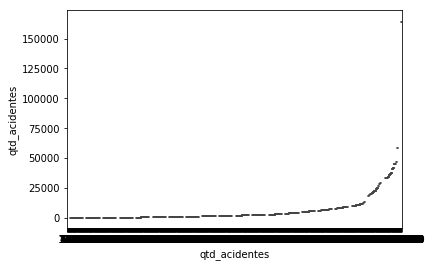

In [426]:
sns.boxplot(y="qtd_acidentes",data=df_uf)

In [424]:
teste.head(30)

,ano,estado,motivo/situação,qtd_acidentes,latitude,longitude,cod_estado,uf,regiao,populacao
0,2001,Rondônia,Típico-Com Cat,1559.0,-8.76077,-63.8999,11,RO,Norte,1407886.0
1,2001,Rondônia,Trajeto-Com Cat,262.0,-8.76077,-63.8999,11,RO,Norte,1407886.0
2,2001,Rondônia,Doença do Trabalho-Com Cat,32.0,-8.76077,-63.8999,11,RO,Norte,1407886.0
3,2002,Rondônia,Típico-Com Cat,1665.0,-8.76077,-63.8999,11,RO,Norte,1431777.0
4,2002,Rondônia,Trajeto-Com Cat,263.0,-8.76077,-63.8999,11,RO,Norte,1431777.0
5,2002,Rondônia,Doença do Trabalho-Com Cat,68.0,-8.76077,-63.8999,11,RO,Norte,1431777.0
6,2003,Rondônia,Típico-Com Cat,1718.0,-8.76077,-63.8999,11,RO,Norte,1455907.0
7,2003,Rondônia,Trajeto-Com Cat,288.0,-8.76077,-63.8999,11,RO,Norte,1455907.0
8,2003,Rondônia,Doença do Trabalho-Com Cat,74.0,-8.76077,-63.8999,11,RO,Norte,1455907.0
9,2004,Rondônia,Típico-Com Cat,1931.0,-8.76077,-63.8999,11,RO,Norte,1562085.0


In [0]:
dasdafa

A princípio foram substituidos os campos vazios, com a população referente ao ano anterior

In [0]:
df_uf["populacao"] = df_uf.groupby(["estado"])["populacao"].ffill()

In [0]:
df_uf.head(50)

Com a base de dados tratada agora é possivel tirar alguns insights dos dados adquiridos

In [0]:
df_uf.describe()

In [0]:
df_uf.columns

In [0]:
b = sns.boxplot(y='motivo/situação',
                x ="qtd_acidentes",
                data = df_uf)

A princípio é possivel observar alguns pontos interessantes:
* Não houve em momento algum um ponto com zero acidentes
* O maior númedo de acidentes registrado foi 165179 - o que levanta a questão a respeito do quando e onde isso ocorreu.
* Esse número grande de acidentes se trata de um outlier uma vez que a grande maioria dos valores está entre 0 a 3000 acidentes.


In [0]:
#numero de estados por região
df_uf.groupby(by=["regiao"])[["estado"]].nunique()

Os dados estão destribuidos em 5 regiões. A região do nordeste é a mais representativa no data set por conta justamente do numero grande de estados.

###  Top 10 estados com mais acidentes

In [0]:
agrupado = df_uf.groupby(by=['estado',"regiao","ano"])[["qtd_acidentes"]].sum().reset_index()

anos = agrupado.ano.unique()

In [0]:
#media dos anos
agrupado_media = agrupado.groupby(by=["estado","regiao"])[["qtd_acidentes"]].mean()
agrupado_media.sort_values(by="qtd_acidentes",ascending=False,inplace=True)
agrupado_media=agrupado_media.reset_index()
agrupado_media.head(10)

Mais uma vez São Paulo se mostra como grande outlier da massa de dados. Na verdade, com relação as médias todos os estados do sudeste figuram na lista. Porém a comparação é injusta visto que o Brasil é um pais de dimensões continentais e a região sudeste é a mais populosa. Para avaliar melhor a situação do pais deve ser observado os estados com as maiores médias de acidente e em seguida observar o comportamento deles ao longo dos anos.

In [0]:
plt.figure(figsize = (16,6))
m = sns.barplot(y="estado",
                x ="qtd_acidentes",
                data = agrupado_media);
m.set_title("Média da quantidade de Acidentes de Trabalho por estado");


Os estados foram divididos por regiões de forma a melhorar a visualização do gráfico interativo abaixo.

In [0]:
#@title Estados com mais acidentes por região por ano { run: "auto" }
ano = 2003 #@param {type:"slider", min:1988, max:2016, step:1}
regiao = "Centro-Oeste" #@param ["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"]

#agrupando o df por regiao
agrupado_regiao = agrupado[agrupado["regiao"]==regiao]

#criando o df para ser plotado
data = agrupado[agrupado["regiao"]==regiao]
data = data[data["ano"]==ano]
data.sort_values("qtd_acidentes",inplace=True,ascending=False)

#plotando
plt.figure(figsize =(16,6))
p = sns.barplot(y=list(data.estado.unique()),
                  x="qtd_acidentes",
                  data=data);
p.set_xlim(min(agrupado_regiao.qtd_acidentes)
           ,max(agrupado_regiao.qtd_acidentes))
p.set_title(regiao + " - "+str(ano));


In [0]:
plt.figure(figsize=(16, 6))
g = sns.FacetGrid(agrupado,
                  col="regiao",
                  size = 5,
                  aspect = 3,
                  sharey=False,
                  hue = "regiao");


g.map_dataframe(sns.barplot,'ano',"qtd_acidentes",ci = None).add_legend()


No que diz respeito as médias. As regiões Norte, Nordeste e Centro-Oeste apresentaram um comportamento parecido ao longo dos anos. O comportamento é descrito como uma queda na quantidade de acidentes no início da decada de 90 e logo seguido por uma crescente até 2016. Este comportamento não foi observado nas regiões, Sul e Sudeste. A região Sudeste vinha em queda até 2001. de 2002 a 2013, o Sudeste experimentou um aumento de mais de 40000 acidentes. Desde então a região têm presenciado um progresso na área. A história é parecida para a região Sul.

### Zero Acidentes

Onde será que tivemos zero acidentes?

In [0]:
#Criando a tabela de zero acidentes
zero_acidentes = df_uf[df_uf['qtd_acidentes']==0]
zero_acidentes.sort_values(["regiao",
                            "estado",
                            "ano"]).drop(labels=["latitude",
                                                 "longitude",
                                                 "cod_estado",
                                                 "uf"],axis=1)

In [0]:
p = sns.countplot(x="ano",hue="regiao",data=zero_acidentes)
p.set_title("Qtd de estados com zero acidentes por região e por ano");

Os estados do norte apresentam a maior prevalência de anos sem acidente de qualquer tipo. Porém nenhum estado passou um ano sem acidente desde 1998, como mostra o grafico acima. Fica evidenciado também que o sudeste não teve  nenhum ano sem acidentes.

No entanto na maioria dos anos em que não ocorreram acidentes de trabalho, a não ocorrência diz respeito ao motivo de doença de trabalho. Os anos em que tivemos zero acidentes de qualquer tipo são mostrados na tabela abaixo:

In [0]:
zero_acidentes.groupby(['regiao','ano'])[["motivo/situação"]].nunique()

Infelizmente, não tivemos nenhum ano com nenhum tipo de acidente, em região nenhuma do país(se tivessemos encontrariamos alguma linha da tabela indicando as 4 categorias da coluna "motivo/situação").

In [0]:
p = sns.countplot(y="estado",
                  data = zero_acidentes,
                  hue = "regiao",
              order = zero_acidentes['estado'].value_counts().index)
p.set_title("Qtd de anos com zero acidentes por estado");

O Acre foi, de longe, o estado que teve a maior quantidade de anos sem registrar acidentes. 

---

(cruzar essa informação com quantidade de postos de trabalho, população e postos de trabalho irregular )

### O maior número de acidentes registrado

Onde será que tivemos a maior quantidade de acidentes registrados?

In [0]:
#selecionando a linha com o maior número de acidentes registrado
df_uf[df_uf['qtd_acidentes']==419981]

1988 foi um ano tenso para São Paulo, que chegou a registrar um número tão expressivo de acidentes. O que traz o questionamento a respeito de como é a série histórica da maior metrópole brasileira. 

In [0]:
p = sns.lineplot(x="ano",
             y = "qtd_acidentes",
             hue = "motivo/situação",
             style ="motivo/situação" ,
             markers =True ,
             data=df_uf[df_uf["estado"]=="São Paulo"])
p.set_title("Qtd de Acidentes de SP por ano e motivo");

É possivel observar uma tendência de queda na quantidade de acidentes Típicos-com Cat(que são maioria) até os anos 2000. O que levanta uma outra questão. Como se comporta a queda de São Paulo com relação a média regional?

In [0]:
#fazendo a média da região
mean_regiao = df_uf[df_uf["estado"]!="São Paulo"].groupby(by = ["regiao","motivo/situação","ano"])[["qtd_acidentes"]].mean()
mean_regiao.reset_index(inplace = True)


In [0]:

#plotando os dados
p = sns.lineplot(x="ano",
             y = "qtd_acidentes",
             hue = "motivo/situação",
             style ="motivo/situação" ,
             markers =True ,
             data=mean_regiao[(mean_regiao["regiao"]=="Sudeste")&
                             (mean_regiao["motivo/situação"]=="Típico-Com Cat")])
p.set_title("Média de Acidentes da Região Sudeste por ano");

In [0]:
#Criar gráfico que sobreponha a média da região com os valores de sp

### Distribuição da quantidade de acidentes por região

Observando a série histórica de todas as regiões do país é necessário se fazer uma analise em função do Log da quantidade de acidentes. Isso decorre do fato que a quantidade de acidentes é muito discrepante de região para região, como pode ser observado no gráfico abaixo

In [0]:
g = sns.FacetGrid(df_uf, col="regiao") 
g.map(sns.boxplot, "qtd_acidentes")
plt.xscale("log");

A região sudeste apresenta a distribuição mais concentrada nos valores entre $10^3$ e $10^4$, assim como a região sul. O que não é verdade para as outras regiões do pais que possuem os valores mais próximos da ordem de $10^2$ e $10^3$


### O mapa dos acidentes de trabalho

Agora com uma base de dados com as informações de latitude e longitude, meu objetivo é tentar retirar algumas informações com base na leitura de alguns mapas. Para isso usarei a biblioteca do Python Folium

In [0]:
import folium

In [0]:
#@title  { run: "auto" }
ano = 2010 #@param {type:"slider", min:1988, max:2016, step:1}
df_uf_map = df_uf[df_uf["ano"]==ano]
df_uf_map = df_uf_map.groupby(['estado',
                                 'latitude',
                                 'longitude'],
                                as_index=False)[['qtd_acidentes']].sum()
df_uf_map.qtd_acidentes = df_uf_map.qtd_acidentes.astype("int64")




ac_map = folium.Map(location=[-16.1237611, -59.9219642],
                    zoom_start=4)
for i in range(0,len(df_uf_map)):
  folium.CircleMarker(
      location =[df_uf_map.iloc[i]['latitude'],
                 df_uf_map.iloc[i]['longitude']],
      popup = df_uf_map.iloc[i]['estado']+' ; '+df_uf_map.iloc[i]['qtd_acidentes'].astype('str'),
      radius=int(df_uf_map.iloc[i]['qtd_acidentes']/5000),
      fill_color="crimson"
  ).add_to(ac_map)


ac_map



O mapa nos da um melhor compreendimento do que vem acontecendo ao longo dos anos com relação aos acidentes de trabalho

In [0]:
from folium.plugins import HeatMap
heat_map = folium.Map(location=[-16.1237611, -59.9219642],
                    zoom_start=4)

heat_data = df_uf_map.drop(["estado"],axis=1)

media_acidentes = heat_data.qtd_acidentes.mean()
desvio_acidentes = heat_data.qtd_acidentes.std()

heat_data["qtd_acidentes"]=(heat_data.qtd_acidentes-media_acidentes)/desvio_acidentes


HeatMap( list(zip(heat_data.latitude.values, heat_data.longitude.values,heat_data.qtd_acidentes.values)),
        max_zoom=1).add_to(heat_map)

heat_map

## Acidentes de Trabalho por Sexo e Faixa Etária

In [0]:
url = "https://raw.githubusercontent.com/lorransr/CAT/master/ACT-faixaetaria-sexo.csv"

In [0]:
df_agesex = pd.read_csv(url, sep=",", encoding = "latin-1")

In [0]:
df_agesex.head()

O dataframe em questão agora contém os registros de acidente de trabalho por faixa etaria e sexo.

In [0]:
df_agesex.columns = ["ano",
                     "idade",
                     "motivo/situacao",
                     "sexo",
                     "qtd_acidentes",
                     "situacao"]

In [0]:
df_agesex.sexo.value_counts()

In [0]:
df_agesex.idade.value_counts()

No que diz respeito a idade, existe um valor sem registro, que pode ser ignorado.

In [0]:
df_agesex = df_agesex[df_agesex.idade != "-"]

In [0]:
df_agesex.situacao.value_counts()

A princípio era de se esperar que a maior quantidade de acidentes de trabalho possuissem a CAT registrada, em vista da obrigação legal da empresa em emiti-la

In [0]:
#checando se existem valores nulos em alguma coluna
df_agesex.isnull().values.any()

In [0]:
df_agesex.dtypes

In [0]:
df_agesex[["ano","qtd_acidentes"]] = df_agesex[["ano","qtd_acidentes"]].astype("int")

In [0]:
df_agesex=df_agesex[df_agesex["sexo"]!="Ignorado"]
df_agesex=df_agesex[df_agesex["idade"]!="Ignorada"]

In [0]:
df_agesex.shape

In [0]:
df_agesex.describe()

In [0]:
df_agesex.groupby(by = "idade")[["qtd_acidentes"]].describe()

In [0]:
plt.figure(figsize = (18,8))
g = sns.barplot(data = df_agesex,
                x = "idade",
                y = "qtd_acidentes")
g.set_title("Media de Quantidade de Acidentes por Faixa Etaria");


A princípio é possivel se observar que em média, os acidentes acontecem em sua grande maioria na faixa dos 19 até os 39 anos. O que chama bastante a atenção é o fato de que até os 19 anos possuir uma quantidade tão alta de acidentes. Menores de idade não podem trabalhar, estagiários possuem diversas limitações em suas atividades, assim como jovens aprendizes. No entanto, a quantidade de acidentes registrado pra essa faixa etaria tão pequena (apenas 2 anos) é tão representativa quanto a média dos trabalhadores de 55 a 59 anos..

In [0]:
df_agesex.groupby(by = "sexo")[["qtd_acidentes"]].describe()

In [0]:
plt.figure(figsize = (18,8))
g = sns.barplot(data = df_agesex,
                x = "sexo",
                y = "qtd_acidentes")
g.set_title("Media de Quantidade de Acidentes por Sexo");

Em média os homens se acidentam 25,x mais que as mulheres. No entanto, Ate o terceiro quartil (75%) a quantidade de acidentes para os dois sexos é parecida. Nesse sentido é interessante observar, também, que a distribuição dos acidentes de trabalho que ocorrem com mulheres ao longo dos anos possuem  uma distribuição mais apertada, em relação aos homens.

In [0]:
plt.figure(figsize = (18,8))

g = sns.boxplot(data = df_agesex,
                y = "idade",
                x = "qtd_acidentes")
g.set_title("boxplot da Quantidade de Acidentes por Faixa Etaria");


Como pode ser observado, os acidentes por faixa etaria tem uma natureza desperça com diversos outliers. Para entender melhor os dados será necessária a observação da faixa etaria e contrasta-la por sexo.

In [0]:
g = sns.catplot(x = "sexo",
                y = "qtd_acidentes",
                data = df_agesex,
                col = "idade",
                kind = "violin",
                hue = "sexo",
                split = True,
                inner = "quartile")

In [0]:
ax = sns.catplot(x = "sexo",
                y = "qtd_acidentes",
                data = df_agesex,
                col = "idade",
                kind = "boxen",
                hue = "sexo")


In [0]:
df_agesex_agg = df_agesex.groupby(by=["ano","idade","sexo"])[["qtd_acidentes"]].sum()
df_agesex_agg.reset_index(inplace=True)
df_agesex_agg.sort_values(by=["ano","idade"])

In [0]:
df_agesex_agg.idade.unique()

In [0]:
ordered_age = ['Até 19 Anos','20 a 24 Anos', '25 a 29 Anos',
               '30 a 34 Anos', '35 a 39 Anos','40 a 44 Anos',
               '45 a 49 Anos', '50 a 54 Anos', '55 a 59 Anos',
               '60 a 64 Anos', '65 a 69 Anos', '70 Anos e Mais']
df_agesex_agg["idade_code"]=df_agesex_agg.idade.astype("category",
                                                        ordered=True,
                                                        categories = ordered_age).cat.codes
df_agesex_agg.sort_values(by="idade_code",inplace=True)

In [0]:
df_agesex_agg["piram"]=df_agesex_agg[["qtd_acidentes","sexo"]].apply(lambda x:
                                                              x["qtd_acidentes"] if x["sexo"]=="Feminino" else x["qtd_acidentes"]*(-1),
                                                              axis =1)

In [0]:
#desenhando a figura
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'sexo'
order_of_bars = df_agesex_agg.idade.unique()[::-1]
colors = [plt.cm.Wistia(i/float(len(df_agesex_agg[group_col].unique())-1)) for i in range(len(df_agesex_agg[group_col].unique()))]

for c, group in zip(colors, df_agesex_agg[group_col].unique()):
    sns.barplot(x='piram', y='idade', data=df_agesex_agg.loc[df_agesex_agg[group_col]==group, :], order=order_of_bars, color=c, label=group)
    
#decorativo
plt.xlabel("Quantidade de Acidentes")
plt.ylabel("Faixa Etária")
plt.yticks(fontsize=12)
plt.title("Piramide etária dos acidentes de trabalho", fontsize=22)
plt.legend()
plt.show()


Essa pirâmide nos mostra que em média as mulheres se acidentam menos que os homens em todas as faixas etárias. Mostra também que a quantidade de acidentes possui um pico na faixa dos 25 aos 29 anos tanto para homens como para mulheres. Pelas barras de erro, vemos que as mulheres possuem a média de quantidade de acidentes menos dispersa na distribuição, em contraste com a dos homens. Por fim, Com os dados em questão, é possível também comparar essa pirâmide ano a ano e ir observando sua evolução.

In [0]:
anos = df_agesex_agg.sort_values("ano").ano.unique()

In [0]:
for i in anos:
  df_ano = df_agesex_agg[df_agesex_agg["ano"]==i]
#desenhando a figura
  plt.figure(figsize=(13,10), dpi= 80)
  group_col = 'sexo'
  order_of_bars = df_ano.idade.unique()[::-1]
  colors = ["C1","C2"]
  
  
  for c, group in zip(colors, df_ano[group_col].unique()):
      sns.barplot(x='piram', y='idade', data=df_ano.loc[df_ano[group_col]==group, :], order=order_of_bars, color=c, label=group)
    
#decorativo
  plt.xlabel("Quantidade de Acidentes")
  plt.xlim((-110000,50000))
  plt.ylabel("Faixa Etária")
  plt.yticks(fontsize=12)
  plt.title("Piramide etária dos acidentes de trabalho em {}".format(i), fontsize=22)
  plt.legend()
  plt.show()

In [0]:
plt.figure(figsize=(16,10))
sns.boxplot(x="ano",y="qtd_acidentes",data = df_agesex_agg)

Tendo em vista os dois gráficos, podemos observar que o número de acidentes de trabalho até meados de 2012 vinha se tornando mais disperso em relação a mediana. Com distribuições cada vez mais espaçadas. Isso decorre do fato de que os acidentes se concentram mais nos grupos etários jovens (dos 20 aos 44) os outros grupos po